In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df.shape
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
numeric_df = df.drop('species',axis=1)
corr_m = numeric_df.corr()
corr_m.round(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.00,-0.12,0.87,0.82
sepal width (cm),-0.12,1.00,-0.43,-0.37
petal length (cm),0.87,-0.43,1.00,0.96
petal width (cm),0.82,-0.37,0.96,1.00


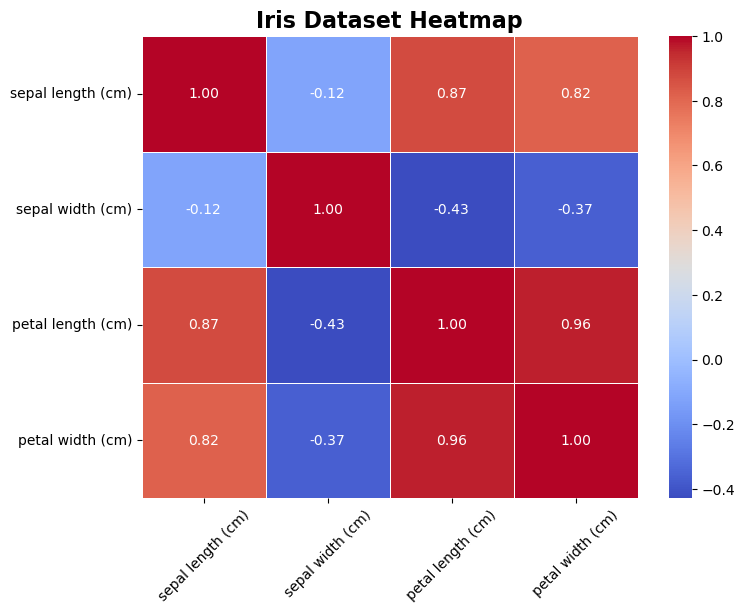

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_m, annot = True, linewidths=0.5, cmap='coolwarm', fmt='.2f')
plt.title('Iris Dataset Heatmap', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.show()


In [ ]:
strong_pairs = corr_m.unstack().sort_values(ascending=False)
strong_pairs = strong_pairs[(abs(strong_pairs) > 0.7) & (abs(strong_pairs)<1.0)]

petal length (cm)  petal width (cm)     0.962865
petal width (cm)   petal length (cm)    0.962865
sepal length (cm)  petal length (cm)    0.871754
petal length (cm)  sepal length (cm)    0.871754
sepal length (cm)  petal width (cm)     0.817941
petal width (cm)   sepal length (cm)    0.817941
dtype: float64

In [19]:
seen = set()
for (f1,f2), val in strong_pairs.items():
    if (f2,f1) not in seen:
        print(f"{f1} - {f2} {val:.3f}")
        seen.add((f1,f2))

petal length (cm) - petal width (cm) 0.963
sepal length (cm) - petal length (cm) 0.872
sepal length (cm) - petal width (cm) 0.818
